# Week 4 Exercises: Data Visualisation

This week in particular does not have correct "solutions". However, I encourage you to attempt the following:

- Make your figures as complete and professional as possible. This means adding titles, legends, axis labels, and making them aesthetically pleasing.
- Write the solutions as generalisable functions. As much as possible you should be able to substitute the inputs and still get a complete and correctly-labelled figure.

Additional code examples can be found in: https://github.com/muhark/dpir-intro-python/blob/master/Week4/figures.py

## Task 1: Simple Figure

Using the BES data:

- Create a figure with a single subplot.
- Plot the answer to item 'a02' (party best suited to tackle the biggest issue in Britain) as a function of age.

As an additional challenge, try using only functions from `matplotlib` for this figure.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set_style('darkgrid')

In [2]:
# import the data
link = 'http://github.com/muhark/dpir-intro-python/raw/master/Week2/data/bes_data_subset_week2.feather'
bes_df = pd.read_feather(link)

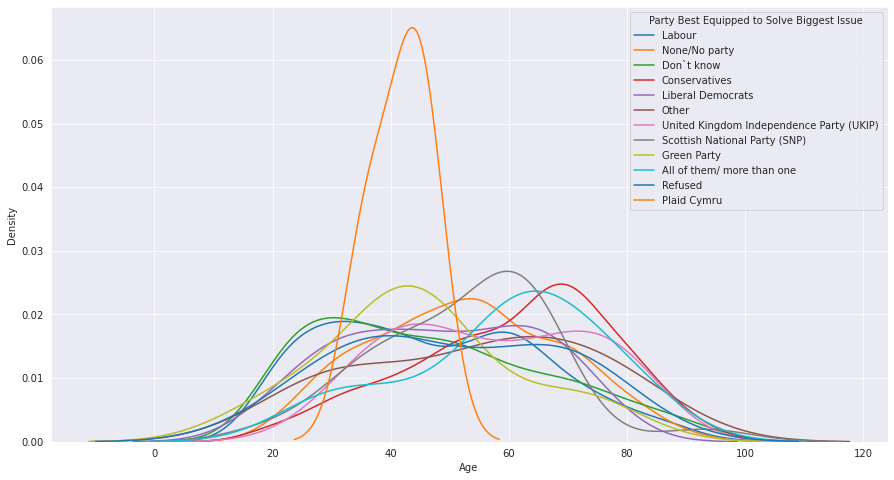

In [3]:
# Showing age distribution by a02 using KDEs
f, ax = plt.subplots(1, 1, figsize=(15, 8))
df = bes_df[['Age', 'a02']].dropna()
for party in df['a02'].unique():
    sns.kdeplot(df[df['a02']==party]['Age'], label=party)
ax.legend(title='Party Best Equipped to Solve Biggest Issue');

## Task 2: Panelling

Recreate the same figure as above, but with a separate subplot for each region.

- Challenge 1: Use a for-loop
- Challenge 2: Write this as a function where 'a02' and 'region' can be substituted for other categorical variables.
- Challenge 3: Make the figure size dynamic, i.e. a function of the number of subplots.
- Challenge 4: Limit the number of subplot columns to 4; if there are more than 4 categories, the function should add an additional row to fit them.

<AxesSubplot:xlabel='region', ylabel='Age'>

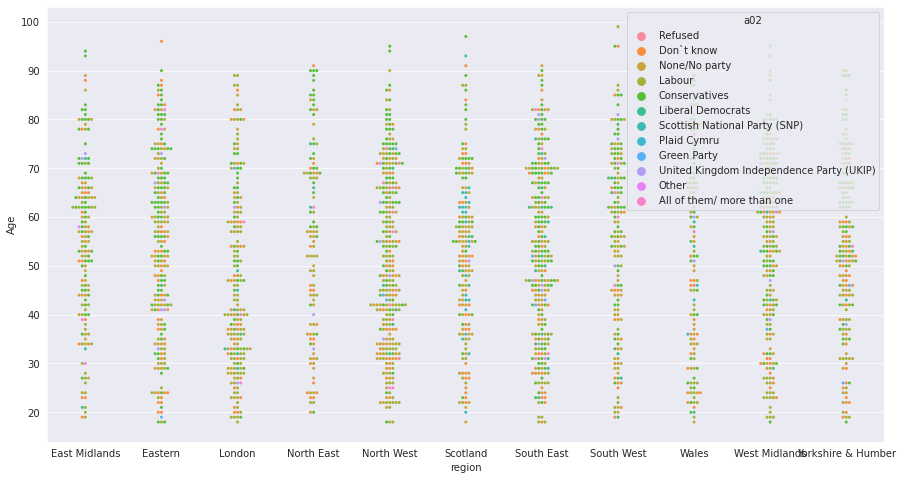

In [4]:
# One option: do it with sns.catplot but all on one subplot
f, ax = plt.subplots(1, 1, figsize=(15, 8))
sns.swarmplot(
    data=bes_df,
    y='Age',
    x='region',
    hue='a02',
    s=3)

In [5]:
# # All Challenges in One Answer:
# data = bes_df
# var1 = 'a02'
# var2 = 'region'
# var3 = 'Age'
# n_cols = 3

def panelled_cross_distributions(data=bes_df, var1='a02', var2='region', var3='Age', n_cols=4):
    """
    Plot kdeplots of the distrbution of `var3` for each of `var1` within `var2` (panelled).
    """
    # Get unique instances of var1 and var2
    v1_list = data[var1].unique()
    v2_list = data[var2].unique()

    # Challenge 4: Making n_rows/n_cols a function of n_plots
    n_plots = len(v2_list)
    if n_plots < n_cols:
        n_rows = 1; n_cols = n_plots
    else:
        n_rows = n_plots//n_cols + 1

    # Challenge 3: Dynamic Figure sizing
    figsize = (n_cols*5, n_rows*3)

    # Initialize figure
    f, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    row = 0; col = 0

    # Iterate over var2 (region)
    for i, v2 in enumerate(v2_list):

        # Axes selection logic
        ax = axes[row][col]
        col += 1 # After choosing, increment col by 1
        if col==n_cols: # Overflow catch
            col = 0; row += 1 # Reset cols, increment row by 1

        # Each subplot needs a title
        ax.set_title(v2)

        # Iterate over var1 (party) within each var2 (region)
        for v1 in v1_list:

            # Select relevant subset
            subset = data[(data[var1]==v1) & (data[var2]==v2)][var3]
            # Only plot kde if the dataset has any variance
            if len(subset) > 10:
                sns.kdeplot(subset, label = v1, ax = ax)
            ax.yaxis.set_label_text('', visible=False)

    # Clear remaining subplots
    while col < n_cols:
        axes[row][col].set_visible(False)
        col += 1

    # Create universal legend
    handles, labels = axes[0][0].get_legend_handles_labels()
    f.legend(handles, labels, loc='right', title="Party")

    f.suptitle(f"Distribution of {var1} within {var2}")
    f.subplots_adjust(top=0.925, hspace=0.28, right=0.875) # Doesn't always work :(
    return f, axes

## Task 3: Color Palettes and Mapping

Seaborn has a lot of resources for customising the color palettes in your figures. See: https://seaborn.pydata.org/tutorial/color_palettes.html

A useful tool when creating figures is creating a column of color values. In other words, given some categorical column, you want to be able to create a column where each category is replaced by a unique color.

Let's try doing this:

- First, create a color palette with a number of colors equal to the number of categories in your column. To do this, you will need the `sns.color_palette()`, `pd.Series.unique()`, and `dict(zip())`.
    - Given two lists, `zip` will combine them into a list of pairs. e.g. `zip([1, 2, 3], ['a', 'b', 'c'])` will return `[(1, 'a'), (2, 'b'), (3, 'c')]`. Passing this to `dict`, i.e. `dict(zip([1, 2, 3], ['a', 'b', 'c']))`, will return `{1: 'a', 2: 'b', 3: 'c'}`.
- Apply the dictionary to your column. You should get back a column of RGB values (a triplet of red, green and blue defining a color).

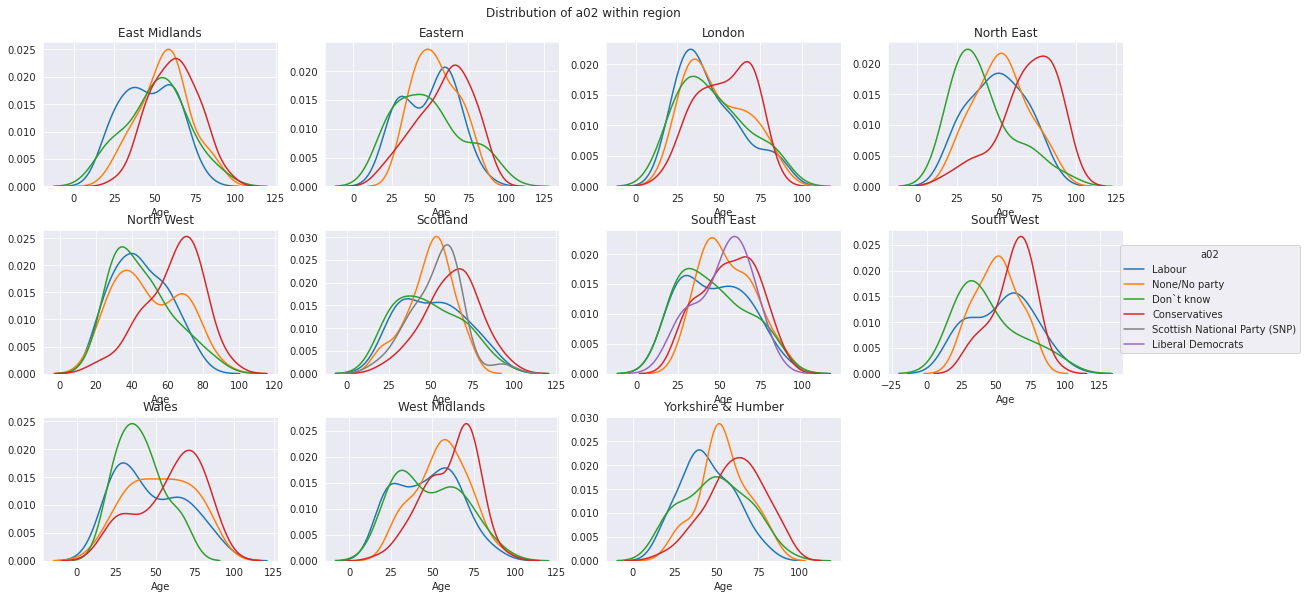

In [6]:
# The function in the previous question had one problem--the legend! Let's fix it here

def panelled_cross_distributions(data=bes_df, var1='a02', var2='region', var3='Age', n_cols=4):
    """
    Plot kdeplots of the distrbution of `var3` for each of `var1` within `var2` (panelled).
    """
    # Get unique instances of var1 and var2
    v1_list = data[var1].unique()
    v2_list = data[var2].unique()

    ##################
    # ColorDict Here #
    ##################

    v1_colors = dict(
        zip(
            v1_list,
            sns.color_palette(n_colors=len(v1_list))
        )
    )
    
    # Challenge 4: Making n_rows/n_cols a function of n_plots
    n_plots = len(v2_list)
    if n_plots < n_cols:
        n_rows = 1; n_cols = n_plots
    else:
        n_rows = n_plots//n_cols + 1

    # Challenge 3: Dynamic Figure sizing
    figsize = (n_cols*5, n_rows*3)

    # Initialize figure
    f, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    row = 0; col = 0
    handles = []
    labels = []

    # Iterate over var2 (region)
    for i, v2 in enumerate(v2_list):

        # Axes selection logic
        ax = axes[row][col]
        col += 1 # After choosing, increment col by 1
        if col==n_cols: # Overflow catch
            col = 0; row += 1 # Reset cols, increment row by 1

        # Each subplot needs a title
        ax.set_title(v2)

        # Iterate over var1 (party) within each var2 (region)
        for v1 in v1_list:

            # Select relevant subset
            subset = data[(data[var1]==v1) & (data[var2]==v2)][var3]
            # Only plot kde if the dataset has any variance
            if len(subset) > 10:
                sns.kdeplot(subset, label = v1, ax = ax, color=v1_colors[v1]) # Explicitly set color here!

        # Remove yaxis label
        ax.yaxis.set_label_text('', visible=False)
        
        # Collect handles and labels for legend
        h, l = ax.get_legend_handles_labels()
        handles += h; labels += l
        
    # Clear remaining subplots
    while col < n_cols:
        axes[row][col].set_visible(False)
        col += 1

    # Create universal legend
    # Get the unique handles and labels
    unique = [(h, l) for i, (h, l) in enumerate(zip(handles, labels)) if l not in labels[:i]]
    f.legend(*zip(*unique), loc='right', title=var1)

    f.suptitle(f"Distribution of {var1} within {var2}")
    f.subplots_adjust(top=0.925, hspace=0.3, right=0.875) # Doesn't always work :(
    return f, axes

f, axes = panelled_cross_distributions();

## Extra Challenge: Crosstab Heatmap

This one is extremely hard. See the following figure: https://github.com/muhark/dpir-intro-python/blob/master/Week4/extra_challenge.png

Do your best to create a similar figure. You will need the `pd.crosstab` function, and the `sns.heatmap` function.

(Solution is in the github, but give it a go!)